# n-step TD Methods on the Random Walk

 Consider using $n$-step TD methods on the 5-state random walk task described in Example 6.2 (page 125).

In [10]:
from IPython.display import Image

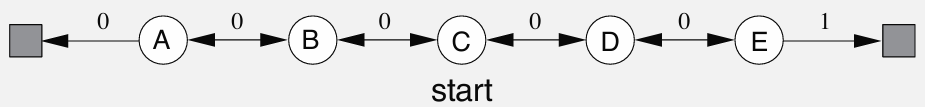

In [11]:
Image(filename="../book_images/Example_6_2_top.PNG")

- Suppose the 1st episode progressed directly from the center state, $C$, to the right, through $D$ and $E$, and then terminated on the right with a return of 1.
- Recall that the estimated values of all the states started at an intermediate value, $V(s)=0.5$.
- As a result of this experience,
  - a 1-step method would change only the estimate for the last state, $V(E)$, which would be incremented toward 1, the observed return,
  - a 2-step method would increment the values of the 2 states preceding termination: $V(D)$ and $V(E)$ both would be incremented toward 1,
  - a 3-step method, or any $n$-step method for $n>2$, would increment the values of all 3 of the visited states toward 1, all by the same amount.
- Which value of $n$ is better?
  - Figure 7.2 shows the results of a simple empirical test for a larger random walk process, with 19 states instead of 5 (and with a -1 outcome on the left, all values initialized to 0), which we use as a running example in this chapter.
  - Results are shown for $n$-step TD methods with a range of values for $n$ and $\alpha$.
  - The performance measure for each parameter setting, shown on the vertical axis, is the square-root of the average squared error between the predictions at the end of the episode for the 19 states and their true values, then averaged over the first 10 episodes and 100 repetitions of the whole experiment (the same sets of walks were used for all parameter settings).
  - Note that methods with an intermediate value of $n$ worked best.
  - This illustrates how the generalization of TD and MC methods to $n$-step methods can potentially perform better than either of the 2 extreme methods.

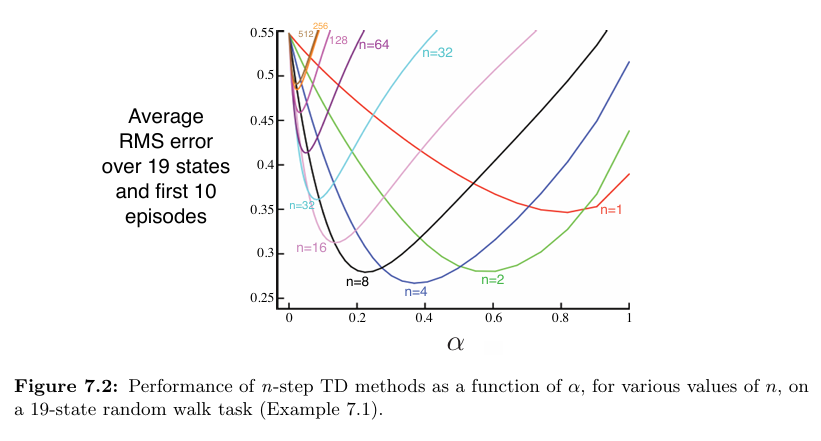

In [12]:
Image(filename="../book_images/Figure_7_2.PNG")

In [3]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from tqdm import tqdm

In [1]:
from src.random_walk import states_number, temporal_difference, true_state_values

In [4]:
# All possible steps
steps = np.power(2, np.arange(0, 10))

# All possible step-sizes
step_sizes = np.arange(0, 1.1, 0.1)

In [5]:
# Perform 100 independent runs
runs = 100

# Each run has 10 episodes
episodes = 10

In [6]:
# Track the errors for each (step, step-size) combination
errors = np.zeros((len(steps), len(step_sizes)))

# It will take quite a while to execute (average: 6 min)
for run in tqdm(range(runs)):
    for step_index, step in enumerate(steps):
        for step_size_index, step_size in enumerate(step_sizes):
            # print("Run:", run, "Step:", step, "Step-size:", step_size)
            
            # Initialize state-value estimates with 0s
            state_value_estimates = np.zeros(states_number + 2)
            
            for _ in range(episodes):
                # Use n-step TD Method to update state-value estimates
                temporal_difference(state_value_estimates, step, step_size)
                
                # Calculate the RMS error
                errors[step_index, step_size_index] += np.sqrt(np.sum(np.power(state_value_estimates - true_state_values, 2)) / states_number)

# Take errors average
errors /= episodes * runs

100%|██████████| 100/100 [02:17<00:00,  1.37s/it]


In [7]:
# Plotting
for i in range(len(steps)):
    plt.plot(step_sizes, errors[i, :], label="n = %d" % (steps[i]))

plt.xlabel(r"Step-size parameter ($\alpha$)")
plt.ylabel("Average RMS error")
plt.ylim([0.25, 0.55])
plt.legend()

In [8]:
plt.savefig("../generated_images/figure_7_2.png")
plt.close()